# Dollar-by-Value (DBV) Inventory Analysis

## Objective
This notebook implements a complete Dollar-by-Value analysis system for inventory management. It reads inventory data, computes DBV metrics, classifies items into A/B/C categories, and creates visualizations to support inventory control decisions.

## Method & Formulas
- **Dollar Value**: wi = Di × vi (annual usage × unit cost)
- **Percentage Share**: si = wi / Σwi
- **Cumulative Percentage**: ci = Σ(sr) for r ≤ i
- **ABC Classification**: A (top 80%), B (next 15%), C (remaining 5%)

In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## Data Import and Preparation

In [11]:
def load_inventory_data(file_path='Data.csv'):
    """
    Load inventory data from the provided Data.csv file.
    Expected columns: Item ID, Di (annual usage), vi (unit cost)
    """
    try:
        # Load the specific data file
        df = pd.read_csv(file_path)
        print(f"📂 Data successfully loaded from {file_path}")
        
        # Display original column info
        print(f"Original columns: {list(df.columns)}")
        
        # Clean and standardize column names based on the actual CSV structure
        # The CSV has: Item No., Item ID, 𝐷ᵢ (units/year), 𝑣ᵢ ($/unit)
        df = df.rename(columns={
            'Item ID': 'Item_ID',
            '𝐷ᵢ (units/year)': 'Di',
            '𝑣ᵢ ($/unit)': 'vi'
        })
        
        # Clean the data - remove commas from numbers and convert to numeric
        df['Di'] = df['Di'].astype(str).str.replace(',', '').astype(float)
        df['vi'] = pd.to_numeric(df['vi'], errors='coerce')
        
        # Keep only the essential columns
        df = df[['Item_ID', 'Di', 'vi']].copy()
        
        print(f"✅ Columns cleaned and standardized: Item_ID, Di, vi")
        print(f"📊 Successfully processed {len(df)} inventory items")
        
    except FileNotFoundError:
        print(f"❌ File {file_path} not found. Please ensure Data.csv is in the current directory.")
        return None
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return None
    
    return df

# Load the inventory data from Data.csv
inventory_df = load_inventory_data('Data.csv')

if inventory_df is not None:
    print(f"\n📈 Dataset shape: {inventory_df.shape}")
    print(f"Final columns: {list(inventory_df.columns)}")
    
    # Display basic statistics
    print("\n📊 Data Summary:")
    print(inventory_df.describe())
    
    print("\n📋 Complete dataset:")
    display(inventory_df)
else:
    print("❌ Failed to load data. Please check that Data.csv exists in the current directory.")

📂 Data successfully loaded from Data.csv
Original columns: ['Item No.', 'Item ID', '𝐷ᵢ (units/year)', '𝑣ᵢ ($/unit)']
✅ Columns cleaned and standardized: Item_ID, Di, vi
📊 Successfully processed 20 inventory items

📈 Dataset shape: (20, 3)
Final columns: ['Item_ID', 'Di', 'vi']

📊 Data Summary:
               Di          vi
count    20.00000   20.000000
mean    707.60000   38.504000
std    1516.02442   91.981348
min       1.00000    0.630000
25%       4.00000    4.197500
50%      30.00000   17.815000
75%     564.25000   29.125000
max    6289.00000  422.330000

📋 Complete dataset:


,Item_ID,Di,vi
0,A,80.0,422.33
1,B,514.0,54.07
2,C,19.0,0.65
3,D,2442.0,16.11
4,E,6289.0,4.61
5,F,128.0,0.63
6,G,1541.0,2.96
7,H,4.0,22.05
8,I,25.0,5.01
9,J,2232.0,2.48


## DBV Calculations

In [12]:
def compute_dbv_metrics(df):
    """
    Compute Dollar-by-Value metrics for inventory analysis.
    """
    # Create a copy to avoid modifying original data
    dbv_df = df.copy()
    
    # Step 1: Calculate dollar value (wi = Di × vi)
    dbv_df['wi'] = dbv_df['Di'] * dbv_df['vi']
    
    # Step 2: Calculate percentage share (si = wi / Σwi)
    total_dollar_value = dbv_df['wi'].sum()
    dbv_df['si'] = (dbv_df['wi'] / total_dollar_value) * 100
    
    # Step 3: Sort by dollar value in descending order
    dbv_df = dbv_df.sort_values('wi', ascending=False).reset_index(drop=True)
    
    # Step 4: Add rank
    dbv_df['Rank'] = range(1, len(dbv_df) + 1)
    
    # Step 5: Calculate cumulative percentage
    dbv_df['Cumulative_Percent'] = dbv_df['si'].cumsum()
    
    # Step 6: Calculate cumulative percentage of items
    dbv_df['Cumulative_Items_Percent'] = (dbv_df['Rank'] / len(dbv_df)) * 100
    
    return dbv_df

# Compute DBV metrics
dbv_results = compute_dbv_metrics(inventory_df)
print("🔢 DBV calculations completed")
dbv_results.head(10)

🔢 DBV calculations completed


,Item_ID,Di,vi,wi,si,Rank,Cumulative_Percent,Cumulative_Items_Percent
0,D,2442.0,16.11,39340.62,24.220280,1,24.220280,5.0
1,A,80.0,422.33,33786.40,20.800792,2,45.021072,10.0
2,E,6289.0,4.61,28992.29,17.849271,3,62.870342,15.0
3,B,514.0,54.07,27791.98,17.110293,4,79.980635,20.0
4,P,715.0,20.78,14857.70,9.147229,5,89.127864,25.0
5,O,101.0,59.50,6009.50,3.699783,6,92.827647,30.0
6,J,2232.0,2.48,5535.36,3.407876,7,96.235524,35.0
7,G,1541.0,2.96,4561.36,2.808228,8,99.043751,40.0
8,R,35.0,19.52,683.20,0.420616,9,99.464367,45.0
9,N,12.0,25.89,310.68,0.191272,10,99.655639,50.0


## ABC Classification

In [13]:
def classify_abc_items(df, a_threshold=80, b_threshold=95):
    """
    Classify items into A, B, C categories based on cumulative dollar value.
    
    Parameters:
    - a_threshold: Cumulative % threshold for A items (default: 80%)
    - b_threshold: Cumulative % threshold for B items (default: 95%)
    """
    df_classified = df.copy()
    
    # Assign ABC classes using a simpler approach to avoid dtype issues
    df_classified['Class'] = 'C'  # Default all to C
    df_classified.loc[df_classified['Cumulative_Percent'] <= b_threshold, 'Class'] = 'B'
    df_classified.loc[df_classified['Cumulative_Percent'] <= a_threshold, 'Class'] = 'A'
    
    return df_classified

# Apply ABC classification
dbv_classified = classify_abc_items(dbv_results)

# Display classification summary
class_summary = dbv_classified.groupby('Class').agg({
    'Item_ID': 'count',
    'wi': 'sum',
    'si': 'sum'
}).round(2)

class_summary.columns = ['Item_Count', 'Total_Dollar_Value', 'Percent_of_Total']
class_summary['Percent_Items'] = (class_summary['Item_Count'] / len(dbv_classified) * 100).round(2)

print("📋 ABC Classification Summary:")
print(class_summary)

📋 ABC Classification Summary:
       Item_Count  Total_Dollar_Value  Percent_of_Total  Percent_Items
Class                                                                 
A               4           129911.29             79.98           20.0
B               2            20867.20             12.85           10.0
C              14            11649.94              7.17           70.0


## Results Table Export

In [14]:
def export_dbv_table(df, filename='DBV_Output.xlsx'):
    """
    Export the complete DBV analysis table to Excel or CSV.
    """
    # Prepare final table with proper column names
    export_df = df[['Item_ID', 'Di', 'vi', 'wi', 'si', 'Cumulative_Percent', 'Rank', 'Class']].copy()
    export_df.columns = [
        'Item_ID', 'Annual_Usage_Di', 'Unit_Cost_vi', 
        'Dollar_Value_wi', 'Percent_of_Total', 'Cumulative_Percent', 
        'Rank', 'Class'
    ]
    
    # Round numerical columns
    numeric_cols = ['Unit_Cost_vi', 'Dollar_Value_wi', 'Percent_of_Total', 'Cumulative_Percent']
    export_df[numeric_cols] = export_df[numeric_cols].round(2)
    
    # Export to Excel
    output_path = Path(filename)
    if output_path.suffix == '.xlsx':
        export_df.to_excel(output_path, index=False)
    else:
        export_df.to_csv(output_path, index=False)
    
    print(f"💾 DBV table exported to: {output_path}")
    return export_df

# Export results
final_table = export_dbv_table(dbv_classified)
final_table.head()

💾 DBV table exported to: DBV_Output.xlsx


,Item_ID,Annual_Usage_Di,Unit_Cost_vi,Dollar_Value_wi,Percent_of_Total,Cumulative_Percent,Rank,Class
0,D,2442.0,16.11,39340.62,24.22,24.22,1,A
1,A,80.0,422.33,33786.40,20.80,45.02,2,A
2,E,6289.0,4.61,28992.29,17.85,62.87,3,A
3,B,514.0,54.07,27791.98,17.11,79.98,4,A
4,P,715.0,20.78,14857.70,9.15,89.13,5,B


## Pareto Chart Visualization

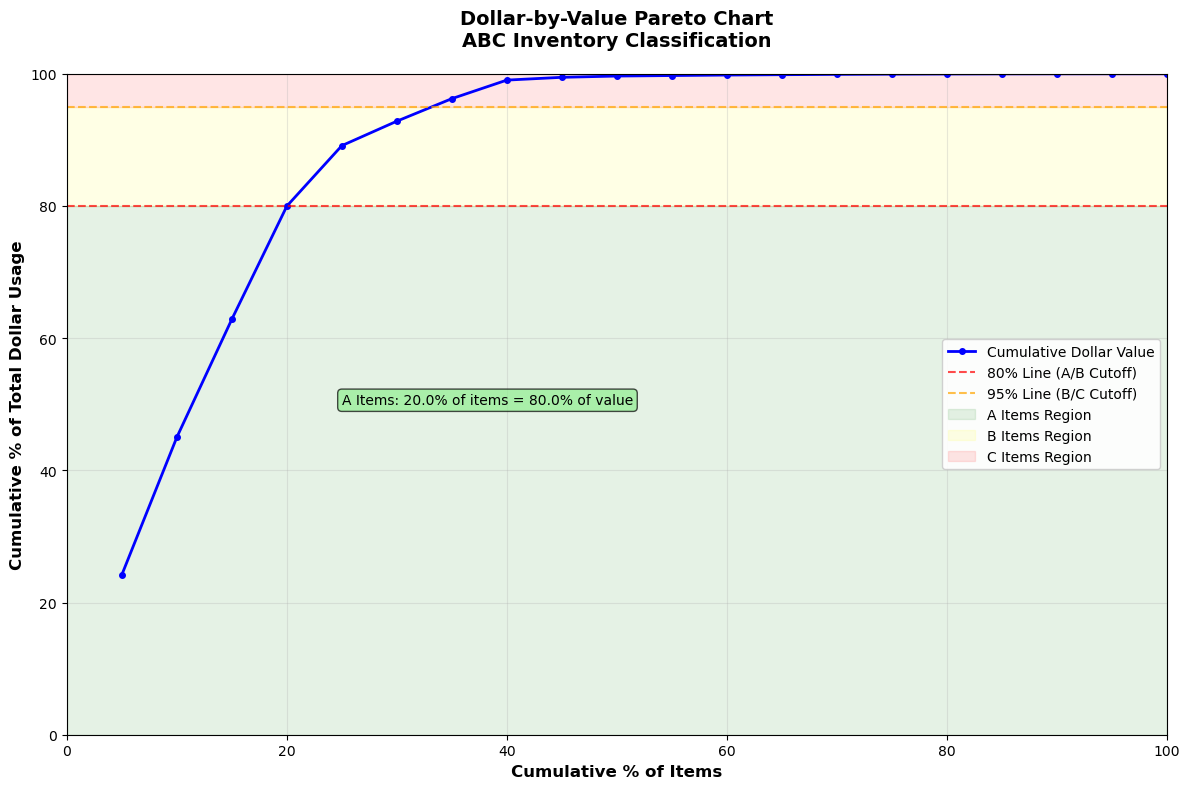

📈 Pareto chart saved as: DBV_Pareto.png


In [15]:
def create_pareto_chart(df, save_path='DBV_Pareto.png'):
    """
    Create a Pareto chart for DBV analysis with A/B/C regions highlighted.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the Pareto curve
    ax.plot(df['Cumulative_Items_Percent'], df['Cumulative_Percent'], 
            'b-o', linewidth=2, markersize=4, label='Cumulative Dollar Value')
    
    # Add 80% and 95% cutoff lines
    ax.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% Line (A/B Cutoff)')
    ax.axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='95% Line (B/C Cutoff)')
    
    # Highlight A/B/C regions with background colors
    ax.axhspan(0, 80, alpha=0.1, color='green', label='A Items Region')
    ax.axhspan(80, 95, alpha=0.1, color='yellow', label='B Items Region')
    ax.axhspan(95, 100, alpha=0.1, color='red', label='C Items Region')
    
    # Customize the chart
    ax.set_xlabel('Cumulative % of Items', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cumulative % of Total Dollar Usage', fontsize=12, fontweight='bold')
    ax.set_title('Dollar-by-Value Pareto Chart\nABC Inventory Classification', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Set axis limits and grid
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='center right', framealpha=0.9)
    
    # Add annotations for key points
    ax.annotate(f'A Items: {class_summary.loc["A", "Percent_Items"]:.1f}% of items = {class_summary.loc["A", "Percent_of_Total"]:.1f}% of value',
                xy=(20, 60), xytext=(25, 50), 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
                fontsize=10, ha='left')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"📈 Pareto chart saved as: {save_path}")

# Create the Pareto chart
create_pareto_chart(dbv_classified)

## Analysis Summary & Additional Questions

In [16]:
def generate_analysis_summary(df, class_summary):
    """
    Generate automatic analysis summary and answer additional questions.
    """
    # Calculate key metrics
    total_items = len(df)
    a_items_count = class_summary.loc['A', 'Item_Count']
    a_items_percent = class_summary.loc['A', 'Percent_Items']
    a_dollar_percent = class_summary.loc['A', 'Percent_of_Total']
    
    # Top 20% of items analysis
    top_20_percent_count = int(total_items * 0.2)
    top_20_percent_value = df.head(top_20_percent_count)['si'].sum()
    
    # Bottom 50% of items analysis  
    bottom_50_percent_count = int(total_items * 0.5)
    bottom_50_percent_value = df.tail(bottom_50_percent_count)['si'].sum()
    
    print("=" * 60)
    print("📊 DOLLAR-BY-VALUE ANALYSIS SUMMARY")
    print("=" * 60)
    
    print(f"""
🔍 KEY FINDINGS:
• The top {a_items_percent:.1f}% of items (Class A) account for {a_dollar_percent:.1f}% of total dollar usage
• This demonstrates the classic 80/20 Pareto principle in inventory management
• {class_summary.loc['C', 'Item_Count']} items ({class_summary.loc['C', 'Percent_Items']:.1f}%) contribute only {class_summary.loc['C', 'Percent_of_Total']:.1f}% of total value

📋 MANAGEMENT RECOMMENDATIONS:
• Class A items require tight inventory control, frequent monitoring, and accurate demand forecasting
• Class B items need moderate control with periodic review and standard ordering procedures  
• Class C items can use simple control systems with bulk ordering and minimal monitoring
• Focus management attention and resources on the few high-value items that drive business impact

📈 ADDITIONAL ANALYSIS:
• Top 20% of items contribute {top_20_percent_value:.1f}% of total dollar usage
• Bottom 50% of items contribute only {bottom_50_percent_value:.1f}% of total dollar usage
• This extreme concentration suggests implementing differentiated inventory policies by class
""")
    
    return {
        'top_20_percent_usage': top_20_percent_value,
        'bottom_50_percent_usage': bottom_50_percent_value,
        'a_items_concentration': a_dollar_percent
    }

# Generate analysis summary
analysis_metrics = generate_analysis_summary(dbv_classified, class_summary)

📊 DOLLAR-BY-VALUE ANALYSIS SUMMARY

🔍 KEY FINDINGS:
• The top 20.0% of items (Class A) account for 80.0% of total dollar usage
• This demonstrates the classic 80/20 Pareto principle in inventory management
• 14 items (70.0%) contribute only 7.2% of total value

📋 MANAGEMENT RECOMMENDATIONS:
• Class A items require tight inventory control, frequent monitoring, and accurate demand forecasting
• Class B items need moderate control with periodic review and standard ordering procedures  
• Class C items can use simple control systems with bulk ordering and minimal monitoring
• Focus management attention and resources on the few high-value items that drive business impact

📈 ADDITIONAL ANALYSIS:
• Top 20% of items contribute 80.0% of total dollar usage
• Bottom 50% of items contribute only 0.3% of total dollar usage
• This extreme concentration suggests implementing differentiated inventory policies by class



## Bonus: Interactive ABC Classification

In [17]:
def interactive_abc_reclassification(df, new_a_threshold=75, new_b_threshold=90):
    """
    Bonus feature: Allow users to modify ABC cutoff thresholds and reclassify items.
    """
    print(f"🔄 Reclassifying with new thresholds: A={new_a_threshold}%, B={new_b_threshold}%")
    
    # Reclassify with new thresholds
    df_new = classify_abc_items(df, new_a_threshold, new_b_threshold)
    
    # Generate new summary
    new_summary = df_new.groupby('Class').agg({
        'Item_ID': 'count',
        'wi': 'sum', 
        'si': 'sum'
    }).round(2)
    new_summary.columns = ['Item_Count', 'Total_Dollar_Value', 'Percent_of_Total']
    new_summary['Percent_Items'] = (new_summary['Item_Count'] / len(df_new) * 100).round(2)
    
    print("\n📊 Updated Classification Summary:")
    print(new_summary)
    
    return df_new, new_summary

# Example of interactive reclassification
print("Example: Reclassifying with A=75%, B=90% thresholds")
new_classification, new_summary = interactive_abc_reclassification(dbv_results, 75, 90)

Example: Reclassifying with A=75%, B=90% thresholds
🔄 Reclassifying with new thresholds: A=75%, B=90%

📊 Updated Classification Summary:
       Item_Count  Total_Dollar_Value  Percent_of_Total  Percent_Items
Class                                                                 
A               3           102119.31             62.87           15.0
B               2            42649.68             26.26           10.0
C              15            17659.44             10.87           75.0


## Conclusion

This notebook provides a complete Dollar-by-Value inventory analysis system that:

✅ Reads inventory data and computes DBV metrics using standard formulas  
✅ Classifies items into A/B/C categories with configurable thresholds  
✅ Exports detailed results table to Excel/CSV format  
✅ Creates professional Pareto charts with highlighted regions  
✅ Provides automated analysis summary and management recommendations  
✅ Includes bonus interactive features for threshold adjustment  

The analysis reveals the typical Pareto distribution in inventory management, where a small percentage of items accounts for the majority of dollar usage. This insight enables managers to implement differentiated control strategies that optimize resources while maintaining service levels.

**Next Steps**: Use this analysis to implement ABC-based inventory policies, set appropriate safety stock levels, and establish review frequencies for each item class.